In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
from pygsp import graphs, filters, plotting, utils

In [27]:
# Create a random directed graph
G = nx.gnp_random_graph(100, 0.5, directed=True)
A = nx.to_numpy_array(G)

In [ ]:
# Reproducing Fig 2 in the magnetic Laplacian paper - (i.e. do we have an intuitive notion of frequency)

In [6]:
def total_variation(f, G):
    source, target, _ = G.get_edge_list()
    TV = 0
    for (s, t) in zip(source, target):
        TV += np.abs(f[s] - f[t])**2
    return TV

In [11]:
# Symmetrize, unweighted A laplacian, just for reference
Asym = A + A.T
Adj = 1 * Asym != 0
gref = graphs.Graph(Adj)

In [14]:
np.linalg.eigvals(gref.L.todense())

array([-1.44576365e-14,  6.15495743e+01,  6.28975659e+01,  6.37066654e+01,
        6.38959972e+01,  6.39446189e+01,  8.62746757e+01,  6.49197689e+01,
        8.57269327e+01,  8.55922823e+01,  8.53137914e+01,  6.52791763e+01,
        8.48190256e+01,  6.58118083e+01,  8.44857891e+01,  8.42677455e+01,
        6.62774693e+01,  8.40970353e+01,  6.64932259e+01,  6.68031022e+01,
        8.34592626e+01,  6.70947672e+01,  6.73478817e+01,  6.75271035e+01,
        6.76776081e+01,  6.78311023e+01,  6.80384693e+01,  6.81972152e+01,
        6.83338163e+01,  8.30788107e+01,  6.86695697e+01,  6.89475246e+01,
        6.90959629e+01,  6.93095841e+01,  6.94762339e+01,  8.28383357e+01,
        8.26478106e+01,  8.25094461e+01,  6.97683854e+01,  7.00188459e+01,
        7.01773114e+01,  7.03520972e+01,  8.19787712e+01,  8.19057236e+01,
        8.17705106e+01,  7.08101750e+01,  8.14686022e+01,  8.13553245e+01,
        8.11562085e+01,  8.10705567e+01,  8.08794291e+01,  8.07184989e+01,
        7.12083612e+01,  

In [15]:
gref = graphs.Graph(Asym)

In [16]:
np.linalg.eigvals(gref.L.todense())

array([-4.38988654e-16,  7.82682254e+01,  8.03016307e+01,  8.10337564e+01,
        1.19633449e+02,  1.18843425e+02,  1.18357438e+02,  8.24474923e+01,
        8.31224785e+01,  8.37541439e+01,  8.43587565e+01,  8.47737616e+01,
        1.16433486e+02,  8.51303391e+01,  1.16143484e+02,  8.54186617e+01,
        1.15753901e+02,  8.58190509e+01,  1.15373585e+02,  1.14945566e+02,
        8.63058130e+01,  8.68812999e+01,  8.72420544e+01,  1.13972615e+02,
        1.13831864e+02,  1.13622141e+02,  1.13328821e+02,  1.13106155e+02,
        1.12631316e+02,  8.75420000e+01,  8.77284554e+01,  1.12035811e+02,
        8.84103513e+01,  8.86099396e+01,  8.87644591e+01,  8.92293665e+01,
        1.11608516e+02,  1.11277063e+02,  1.10593009e+02,  1.10464960e+02,
        9.02389825e+01,  9.02635709e+01,  9.09070677e+01,  9.12453215e+01,
        9.15132306e+01,  9.17884675e+01,  1.09723794e+02,  1.09336656e+02,
        1.09087642e+02,  1.08499784e+02,  1.08291049e+02,  1.07926127e+02,
        1.07825313e+02,  

(24.61304241193556+0j)


/home/akumar/anaconda3/envs/ncontrol/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(24.660078905478823+1.7921228027367438e-16j)


/home/akumar/anaconda3/envs/ncontrol/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(25.77887135825529-2.926261812178735e-16j)


/home/akumar/anaconda3/envs/ncontrol/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(29.151394660281703+2.221851956776552e-15j)


/home/akumar/anaconda3/envs/ncontrol/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(60.00986477164312-2.3692902291120345e-22j)


/home/akumar/anaconda3/envs/ncontrol/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


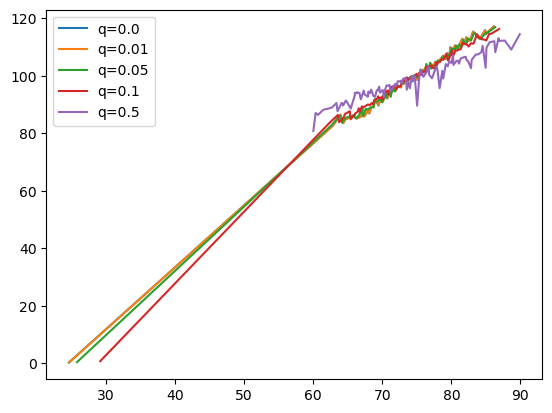

In [18]:
for q_ in np.array([0, 0.01, 0.05, 0.1, 0.5]):
    A = 1 * (A != 0)
    g = graphs.DiGraph(A, q=q_)
    eig, U = np.linalg.eig(g.L)
    print(np.min(eig))
    eig_order = np.argsort(eig)[::-1]
    eig = eig[eig_order]
    U = U[:, eig_order]

    TV = np.zeros(U.shape[1])
    for i in range(U.shape[1]):
        TV[i] = total_variation(U[:, i], g)

    plt.plot(eig, TV, label='q={}'.format(q_))

plt.legend()

In [21]:
np.mean(np.sum(A, axis=1))

49.37

In [25]:
np.arccos(1 - 2/49)/(2 * np.pi)

0.045628948342989965